● Gráfico que muestre el porcentaje de partidas por estado (fin, cancelada, error,
timeout). También debe tener en cuenta las partidas que se terminaron
inesperadamente o de forma repentina (partidas sin evento de fin).

Primero importo las librerias necesarias para obtener la estadistica y abro los archivos

In [8]:
from matplotlib import pyplot as plt
import pandas as pd
import os

ruta = os.path.join(os.getcwd(), '..', 'src', 'datos', 'eventos_partidas.csv')

data_set = pd.read_csv(ruta, encoding='utf-8')

Obtengo todos los estados y guardo la cantidad de cada uno en diferentes variables, para despues mostrarlos en el grafico de torta

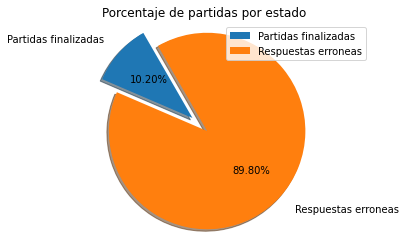

In [21]:
cantidad_estados = data_set.groupby(["estado"]).size()

data_dibujo = []
etiquetas = []

estado_finalizado = cantidad_estados["finalizado"]
data_dibujo.append(estado_finalizado)
etiquetas.append("Partidas finalizadas")

try: 
    estado_timeout = cantidad_estados["timeout"]
    data_dibujo.append(estado_timeout)
    etiquetas.append("Timeout")
except KeyError: 
    estado_timeout = 0

try :
    estado_error = cantidad_estados["error"]
    data_dibujo.append(estado_error)
    etiquetas.append("Respuestas erroneas")
except KeyError:
    estado_error = 0

try:
    estado_cancelado = cantidad_estados["cancelado"]
    data_dibujo.append(estado_cancelado)
    etiquetas.append("Partida abandonada")
except KeyError:
    estado_cancelado = 0


explode = ((0.1),)*len(data_dibujo)

plt.pie(data_dibujo, explode=explode, labels=etiquetas, autopct='%1.2f%%', shadow=True, startangle=120, labeldistance= 1.2)
plt.axis('equal') 
plt.legend(etiquetas)

plt.title("Porcentaje de partidas por estado")
plt.show()